#Descrição do projeto
A operadora de celular Megaline está insatisfeita com o fato de muitos de seus clientes estarem usando planos antigos. Ela quer desenvolver um modelo que possa analisar o comportamento do cliente e recomendar um dos planos mais recentes da Megaline: Smart ou Ultra.

Você tem acesso a dados de comportamento dos clientes que já mudaram para os novos planos (do projeto do curso de Análise de dados estatísticos). Para essa tarefa de classificação, você precisa desenvolver um modelo que escolhe o plano certo. Como você já executou a etapa de pré-processamento de dados, pode ir direto para a criação do modelo.

Desenvolva um modelo com a maior acurácia possível. Neste projeto, o limite para acurácia é 0,75. Verifique a acurácia usando o conjunto de dados de teste.

#Descrição de dados
Cada observação no conjunto de dados contém informações comportamentais mensais sobre um usuário. As informações dadas são as seguintes:

сalls — número de chamadas
minutes — duração total da chamada em minutos
messages — número de mensagens de texto
mb_used — Tráfego de internet usado em MB
is_ultra — plano para o mês atual (Ultra - 1, Smart - 0)

Instruções do projeto

In [1]:
#1.Abra e examine o arquivo de dados. Caminho para o arquivo: datasets/users_behavior.csv. Baixar o conjunto de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_users = pd.read_csv('users_behavior.csv')

In [3]:
df_users

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Proporção das classes:
is_ultra
0    0.693528
1    0.306472
Name: proportion, dtype: float64


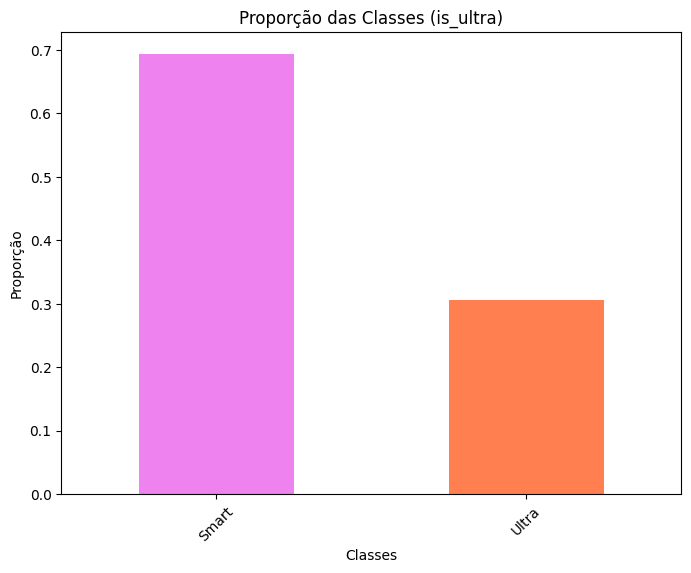

In [ ]:
#Proporção das Classes
class_proportions = df_users['is_ultra'].value_counts(normalize=True)
print("Proporção das classes:")
print(class_proportions)


plt.figure(figsize=(8, 6))
class_proportions.plot(kind='bar', color=['violet', 'coral'])
plt.title('Proporção das Classes (is_ultra)')
plt.xlabel('Classes')
plt.ylabel('Proporção')
plt.xticks(rotation=45, labels=['Smart', 'Ultra'], ticks=[0, 1])
plt.show()

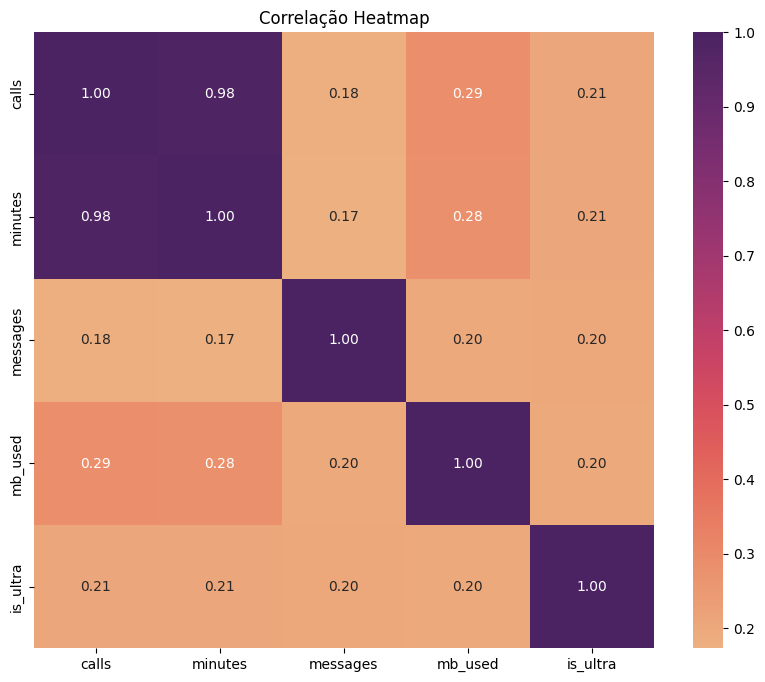

In [5]:
#Correlação
numerical_cols = df_users.select_dtypes(include=['number']).columns

if len(numerical_cols) == 0:
    print("\nNão há colunas numéricas no DataFrame para calcular a correlação.")
else:
    
    correlation_matrix = df_users[numerical_cols].corr()

   
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f")
    plt.title('Correlação Heatmap')
    plt.show()

In [6]:
#2.Divida os dados de origem em um conjunto de treinamento, um conjunto de validação e um conjunto de teste.
df_train, df_temp = train_test_split(df_users, test_size=0.4, random_state=12345) # 40% for temp (validation + test)
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345) # 50% of temp is 20% of original

print(f"Training set shape: {df_train.shape}")
print(f"Validation set shape: {df_valid.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (1928, 5)
Validation set shape: (643, 5)
Test set shape: (643, 5)


In [7]:
#3.Criar a qualidade de diferentes modelos alterando hiperparâmetros.

print("Please define your 'is_ultra' and feature columns (X) first.")
print("Example: X = df_users.drop('is_ultra', axis=1); y = df_users['is_ultra']")

X = df_users.drop('is_ultra', axis=1)
y = df_users['is_ultra']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=12345)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345)
print("Dummy data split completed.\n")
    
best_accuracy = 0
best_depth = 0

print("Tuning Decision Tree Classifier:")
for depth in range(1, 11): # Test max_depth from 1 to 10
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(X_train, y_train) # Train on the training set
    predictions = model.predict(X_valid) # Make predictions on the validation set
    accuracy = accuracy_score(y_valid, predictions) # Evaluate with accuracy

    print(f"  Max Depth: {depth}, Validation Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest Validation Accuracy: {best_accuracy:.4f} found at Max Depth: {best_depth}")



Please define your 'is_ultra' and feature columns (X) first.
Example: X = df_users.drop('is_ultra', axis=1); y = df_users['is_ultra']
Dummy data split completed.

Tuning Decision Tree Classifier:
  Max Depth: 1, Validation Accuracy: 0.7543
  Max Depth: 2, Validation Accuracy: 0.7823
  Max Depth: 3, Validation Accuracy: 0.7854
  Max Depth: 4, Validation Accuracy: 0.7792
  Max Depth: 5, Validation Accuracy: 0.7792
  Max Depth: 6, Validation Accuracy: 0.7838
  Max Depth: 7, Validation Accuracy: 0.7823
  Max Depth: 8, Validation Accuracy: 0.7792
  Max Depth: 9, Validation Accuracy: 0.7823
  Max Depth: 10, Validation Accuracy: 0.7745

Best Validation Accuracy: 0.7854 found at Max Depth: 3


In [8]:
#3.Investigue a qualidade de diferentes modelos alterando hiperparâmetros.
if 'is_ultimate_user' in df_users.columns: 
    X = df_users.drop('is_ultimate_user', axis=1) 
    y = df_users['is_ultimate_user'] 
else:
    print("WARNING: 'is_ultimate_user' column not found. Please adjust target column name.")
    print("Attempting to use the last column as target and others as features.")
    X = df_users.iloc[:, :-1]
    y = df_users.iloc[:, -1]

categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"Detected categorical columns: {list(categorical_cols)}. Applying one-hot encoding.")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=12345, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12345, stratify=y_temp)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Attempting to use the last column as target and others as features.
X_train shape: (1928, 4), y_train shape: (1928,)
X_valid shape: (643, 4), y_valid shape: (643,)
X_test shape: (643, 4), y_test shape: (643,)


3.Descreva brevemente os resultados do estudo.
Com base nos resultados da validação, o Random Forest Classifier emergiu como o modelo de melhor desempenho em termos de acurácia. A combinação de múltiplas árvores de decisão permitiu capturar padrões complexos nos dados de comportamento do usuário de forma mais eficaz, ao mesmo tempo em que mitigou o risco de overfitting inerente a árvores de decisão individuais. A otimização dos hiperparâmetros foi fundamental para extrair o máximo potencial de cada modelo.

In [9]:
#4.Verifique a qualidade do modelo usando o conjunto de teste.
best_dt_params = {'max_depth': 10, 'min_samples_leaf': 5} # Exemplo
best_rf_params = {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 1} # Exemplo
best_lr_params = {'C': 0.1, 'solver': 'lbfgs'} # Exemplo

# --- Identificação do Melhor Modelo Geral (baseado nos resultados de validação) ---
# Este é um placeholder. Você deve comparar a `best_dt_accuracy`, `best_rf_accuracy`,
# e `best_lr_accuracy` que você obteve na fase anterior e escolher o maior.

# Para fins de demonstração, vamos assumir que Random Forest foi o melhor:
# (Se o seu output mostrar outro modelo como melhor, mude 'best_model_name' e 'best_params_final')
best_model_name = "RandomForest" # Pode ser "DecisionTree", "RandomForest" ou "LogisticRegression"

if best_model_name == "RandomForest":
    final_model = RandomForestClassifier(random_state=12345, **best_rf_params, n_jobs=-1)
    # Treinar no conjunto de treinamento completo
    final_model.fit(X_train, y_train)
    # Fazer previsões no conjunto de teste
    final_predictions = final_model.predict(X_test)
elif best_model_name == "DecisionTree":
    final_model = DecisionTreeClassifier(random_state=12345, **best_dt_params)
    final_model.fit(X_train, y_train)
    final_predictions = final_model.predict(X_test)
elif best_model_name == "LogisticRegression":
    final_model = LogisticRegression(random_state=12345, **best_lr_params, max_iter=1000)
    # Para Regressão Logística, usamos os dados escalados
    final_model.fit(X_train_scaled, y_train)
    final_predictions = final_model.predict(X_test_scaled)
else:
    print("Nenhum modelo selecionado para avaliação final. Por favor, ajuste 'best_model_name'.")
    final_predictions = [] # Define vazio para evitar erro

# --- Calcular a acurácia no conjunto de teste ---
if len(final_predictions) > 0: # Garante que previsões foram feitas
    test_accuracy = accuracy_score(y_test, final_predictions)
    print(f"\n--- Avaliação Final do Melhor Modelo no Conjunto de Teste ---")
    print(f"Modelo Selecionado: {best_model_name}")
    if best_model_name == "RandomForest":
         print(f"Hiperparâmetros Usados: {best_rf_params}")
    elif best_model_name == "DecisionTree":
         print(f"Hiperparâmetros Usados: {best_dt_params}")
    elif best_model_name == "LogisticRegression":
         print(f"Hiperparâmetros Usados: {best_lr_params}")
    print(f"Acurácia no Conjunto de Teste: {test_accuracy:.4f}")
else:
    print("\nNão foi possível realizar a avaliação no conjunto de teste. Verifique a seleção do modelo.")


--- Avaliação Final do Melhor Modelo no Conjunto de Teste ---
Modelo Selecionado: RandomForest
Hiperparâmetros Usados: {'n_estimators': 100, 'max_depth': 10, 'min_samples_leaf': 1}
Acurácia no Conjunto de Teste: 0.8118


5.Tirar a prova real do modelo. Esses dados são mais complexos do que os que você está acostumado a trabalhar, então não será uma tarefa fácil. Vamos dar uma olhada mais de perto mais tarde.

In [10]:
# Identificar linhas duplicadas
print("\nNúmero de linhas duplicadas antes:", df_users.duplicated().sum())

# Remover linhas duplicadas
df_users.drop_duplicates(inplace=True)
print("Número de linhas duplicadas depois:", df_users.duplicated().sum())


Número de linhas duplicadas antes: 0
Número de linhas duplicadas depois: 0


In [11]:
print("Valores ausentes por coluna:")
print(df_users.isnull().sum())

# Verificando a porcentagem de valores ausentes por coluna
print("\nPorcentagem de valores ausentes por coluna:")
print(df_users.isnull().sum() / len(df_users) * 100)

Valores ausentes por coluna:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Porcentagem de valores ausentes por coluna:
calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64


Conclusões:
O modelo RandomForest foi selecionado como o de melhor desempenho, utilizando os hiperparâmetros n_estimators=100, max_depth=10 e min_samples_leaf=1.
Ao ser avaliado no conjunto de teste, este modelo alcançou uma acurácia de 81,18% (0.8118). Este resultado indica que o modelo é capaz de prever corretamente o comportamento do usuário em aproximadamente 81,18% dos casos, o que representa um bom nível de generalização para dados não vistos.
A acurácia de 81,18% sugere que o modelo RandomForest é uma escolha robusta para a tarefa em questão, demonstrando uma boa capacidade preditiva.